# Assignment 3

### Amit Nikam
### ID: A20470263
### anikam@hawk.iit.edu
### CS 512 (V02)
### Fall 2020
___

1. Construct and train CNN:

In [1]:
from keras import layers
from keras import models
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### MODEL
def createModel():
  # CONV LAYERS
  model = models.Sequential()
  model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)))
  model.add(layers.MaxPooling2D((2,2)))
  model.add(layers.Conv2D(128, (3,3), activation='relu'))
  model.add(layers.MaxPooling2D((2,2)))
  # FC DEEP LAYERS
  model.add(layers.Flatten())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(.15))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.summary()
  return model

In [3]:
### TRAINING
## LOAD DATA
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Prepare Images
mnist_dataset = np.concatenate((train_images, test_images), axis=0)
mnist_dataset = mnist_dataset.reshape((70000,28,28,1))
mnist_dataset = mnist_dataset.astype('float32') / 255
train_images, validation_images, test_images = np.split(mnist_dataset, [55000, 65000], axis=0)

# Prepare Labels
mnist_labels = np.concatenate((train_labels, test_labels), axis=None)
for idx, item in enumerate(mnist_labels):
    if item % 2 == 0:
        mnist_labels[idx] = 0     # even number
    else:
        mnist_labels[idx] = 1  
train_labels, validation_labels, test_labels = np.split(mnist_labels, [55000, 65000])

## COMPILE & FIT MODEL WITH VALIDATION
model = createModel()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_images,train_labels, epochs=10, batch_size=64, validation_data=(validation_images, validation_labels))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3200)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               409728    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

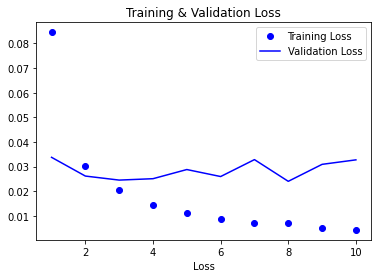

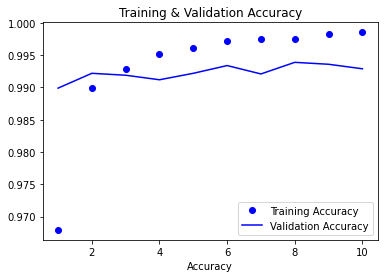

Loss at Final Training Step is: 0.004260866902768612
Accuracy at Final Training Step is: 0.9985636472702026


In [4]:
### PLOTTING

## PREPARE
history_dict = history.history
epochs = range(1, len(history_dict['accuracy']) + 1 )

# PLOT LOSS AS FUNC OF EPOCHS
plt.plot(epochs, history_dict['loss'], 'bo', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.xlabel('Loss')
plt.legend()
plt.show()

# PLOT ACCURACY AS FUNC OF EPOCHS
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.xlabel('Accuracy')
plt.legend()
plt.show()

# LOSS AND ACCURACY OF FINAL TRAINING STEP
print(f'Loss at Final Training Step is: {history_dict["loss"][len(history_dict["loss"])-1]}')
print(f'Accuracy at Final Training Step is: {history_dict["accuracy"][len(history_dict["accuracy"])-1]}')

In [5]:
### SAVE MODEL TO LOAD IN PART 3
model.save('./mnist_even-odd')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./mnist_even-odd/assets


2. Hyper-Parameter Tuning: evaluation in report

3. Inference: OpenCV Application

In [6]:
import cv2
### Load Saved CNN
model = models.load_model('./mnist_even-odd')

In [7]:
### TEST LOADED MODEL WITH MNIST DATASET
test_loss, test_acc = model.evaluate(test_images,test_labels)
print(f"Test Loss for the model is {test_loss}\nTest Accuracy for the model is {test_acc}")

157/157 [==============================] - 3s 19ms/step - loss: 0.0169 - accuracy: 0.9970
Test Loss for the model is 0.016878994181752205
Test Accuracy for the model is 0.996999979019165


In [8]:
# READ AND PREPARE MANUAL IMAGES
img = cv2.imread('./inference_data/4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_og = img.copy()
img = cv2.resize(img, (28, 28))
img = cv2.GaussianBlur(img,(3,3),0)
_,img = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

<Figure size 432x288 with 0 Axes>

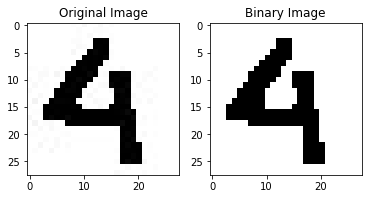

In [9]:
# PLOT IMAGES
plt.figure()
_, axarr = plt.subplots(1,2)
axarr[0].imshow(cv2.cvtColor(img_og, cv2.COLOR_BGR2RGB))
axarr[0].set_title('Original Image')
axarr[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axarr[1].set_title('Binary Image')
plt.show()

In [10]:
# Normalize after image display and reshape
img = img.astype('float32') / 255
img = img.reshape((1,28,28,1))

In [11]:
### INFERENCE
infer = model.predict(img)
if infer[0][0] < 0.5:
  print(f'Prediction: odd number with a confidence of {1-infer[0][0]}')
else:
  print(f'Prediction: even number with a confidence of {infer[0][0]}')

Prediction: even number with a confidence of 0.9952982068061829
